In [30]:
import os 
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from numpy import count_nonzero

dir_ = './data/'
file_name = 'normalized_filter_track_5_user_100.csv'

In [2]:
test = np.loadtxt(os.path.join(dir_, 'test_list_item_' + file_name), delimiter=',')
prediction = np.loadtxt(os.path.join(dir_, 'prediction_item_multi_process_' + file_name), delimiter=',')

In [6]:
df = pd.read_pickle(os.path.join(dir_, 'train_' + file_name[:-3] + 'pkl'))

In [45]:
df_test = pd.read_pickle(os.path.join(dir_, 'test_' + file_name[:-3] + 'pkl'))

In [46]:
df_test = df_test.sort_values(by=['rating'])
df_test

,uid,tid,rating
1205784,207,47511,0.003432
1204475,207,26326,0.003432
1204514,207,26668,0.003432
1204290,207,23795,0.003432
1202674,207,10255,0.003432
...,...,...,...
612173,117,29237,5.000000
612099,117,1607,5.000000
868526,161,166,5.000000
612103,117,3603,5.000000


In [23]:
len(average_list)

54968

In [24]:
average_list = []
for _ in range(df['tid'].max()+1):
    average_list.append(0.0)
    
crash = -1
for i in tqdm_notebook(df['tid'].unique()):
    u = df[df['tid'] == i]
    avg = u['rating'].mean()
    average_list[i] = avg
len(average_list)

54969

In [35]:
mean_absolute_error = 0
n = 0 
m = 0
for i in range(len(test)):
    if not prediction[i] == -1.0:
        mean_absolute_error += abs( prediction[i] - test[i][2] )
        n += 1
        m += 1
    else:
        mean_absolute_error += abs( average_list[int(test[i][1])] - test[i][2] )
        n += 1
    
mean_absolute_error /= n
mean_absolute_error

0.2851006283008319

In [36]:
print(m,n)

47565 140473


In [41]:
# good_prediction = []
# for i in range(0, len(test)):
#     pred = 0
    
#     if not prediction[i] == -1.0:
#         pred = prediction[i]
#     else:
#         pred = average_list[int(test[i][1])]
        
#     if abs( pred - test[i][2] ) < 0.5:
#         good_prediction.append(int(test[i][2]//1))

In [53]:
alpha = 0.80
threshold = float(df_test.iloc[int(len(df_test)*alpha//1)]['rating'])
print(threshold)
good_prediction = []
for i in range(0, len(test)):
    pred = 0
    
    if not prediction[i] == -1.0:
        pred = prediction[i]
    else:
        pred = average_list[int(test[i][0])]
        
    if int(test[i][2]) > threshold and pred > threshold:
        good_prediction.append(1)
    elif int(test[i][2]) < threshold and pred < threshold:
        good_prediction.append(0)
print (int(len(df_test)*alpha//1),int(len(df_test)*(1-alpha)//1))

0.5
112378 28094


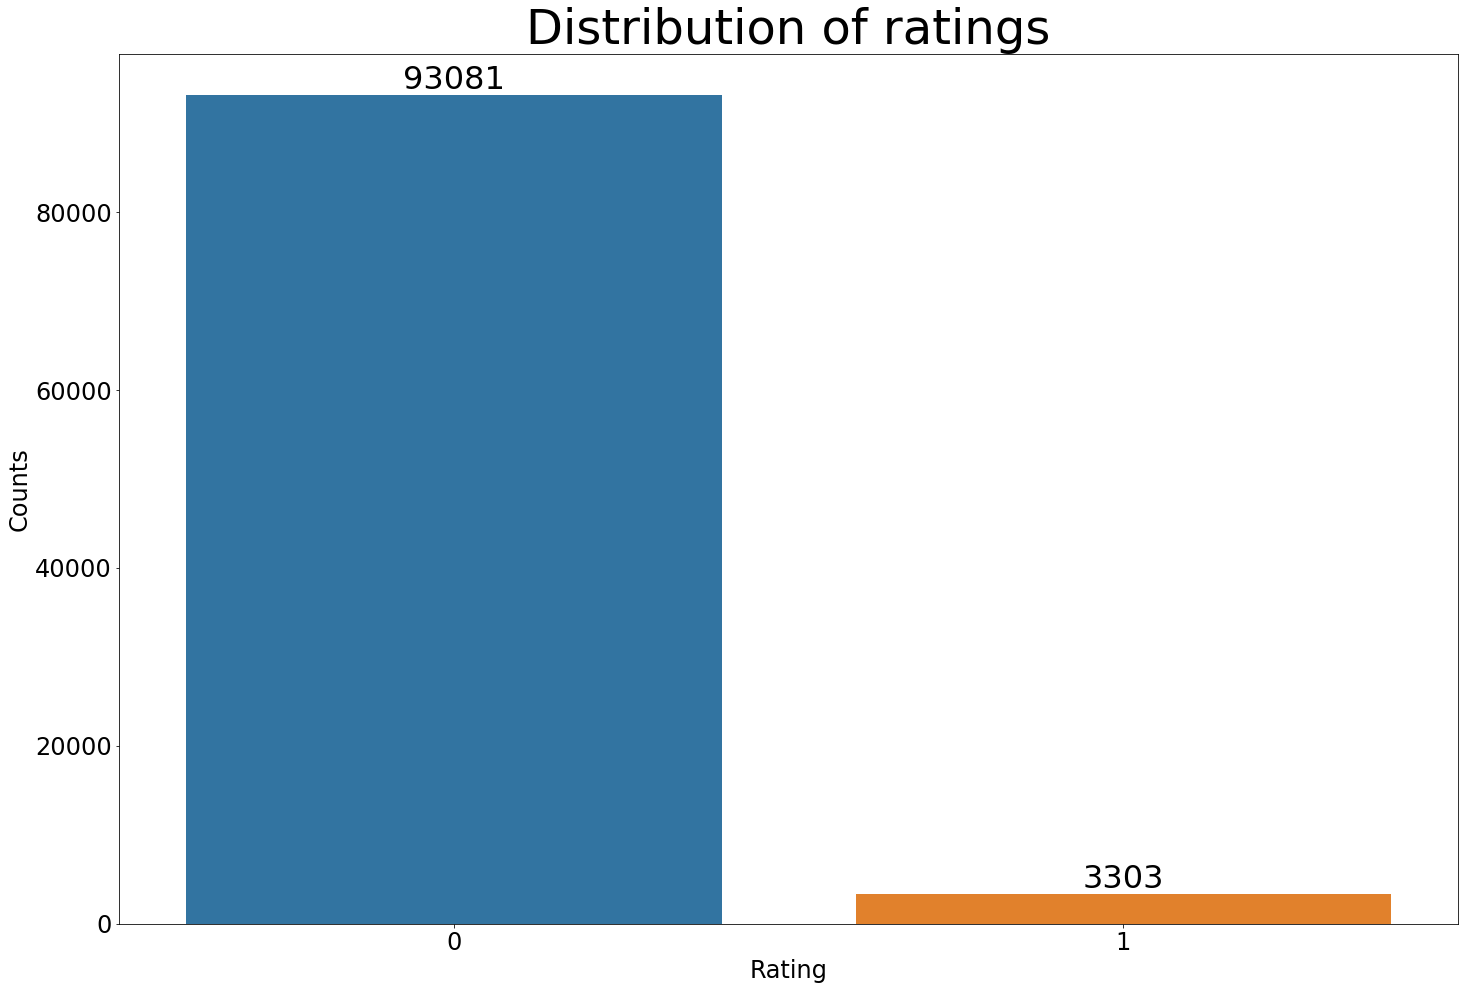

In [54]:
%matplotlib inline

%matplotlib inline

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'Rating':good_prediction})

params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':24,
         'ytick.labelsize':24}

plt.rcParams.update(params)


plt.figure(figsize=(24,16))
ax = sns.countplot(x = "Rating", data = df)
plt.title('Distribution of ratings', fontsize=48)
plt.xlabel('Rating', fontsize=24)
plt.ylabel('Counts', fontsize=24)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:}'.format(int(y)), (x.mean(), y), fontsize=32,
            ha='center', va='bottom') # set the alignment of the text

In [ ]:
%matplotlib inline

%matplotlib inline

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({'Rating':l})

params = {'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':24,
         'ytick.labelsize':24}

plt.rcParams.update(params)


plt.figure(figsize=(24,16))
ax = sns.countplot(x = "Rating", data = df)
plt.title('Distribution of ratings', fontsize=48)
plt.xlabel('Rating', fontsize=24)
plt.ylabel('Counts', fontsize=24)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:}'.format(int(y)), (x.mean(), y), fontsize=32,
            ha='center', va='bottom') # set the alignment of the text

